In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

In [2]:
class DeploymentVoronoi:
    def __init__(self, area_dimensions, num_sensors):
        self.area_dimensions = area_dimensions  # (width, height)
        self.num_sensors = num_sensors
        self.sensors = []
        self.balloons = []

    def place_sensors(self):
        self.sensors = np.random.rand(self.num_sensors, 2)
        self.sensors[:, 0] *= self.area_dimensions[0]
        self.sensors[:, 1] *= self.area_dimensions[1]

    def generate_voronoi(self):
        self.voronoi = Voronoi(self.sensors)

    def place_balloons(self):
        for region in self.voronoi.regions:
            if not -1 in region and len(region) > 0:
                polygon = [self.voronoi.vertices[i] for i in region]
                centroid = np.mean(polygon, axis=0)
                self.balloons.append(centroid)

    def deploy(self):
        self.place_sensors()
        self.generate_voronoi()
        self.place_balloons()

    def plot_deployment(self):
        plt.figure(figsize=(10, 10))
        voronoi_plot_2d(self.voronoi, show_vertices=False, point_size=10)
        plt.scatter(*zip(*self.sensors), color='r', label='Sensors')
        plt.scatter(*zip(*self.balloons), color='b', label='Balloons')
        plt.xlim(0, self.area_dimensions[0])
        plt.ylim(0, self.area_dimensions[1])
        plt.legend()
        plt.show()

<Figure size 1000x1000 with 0 Axes>

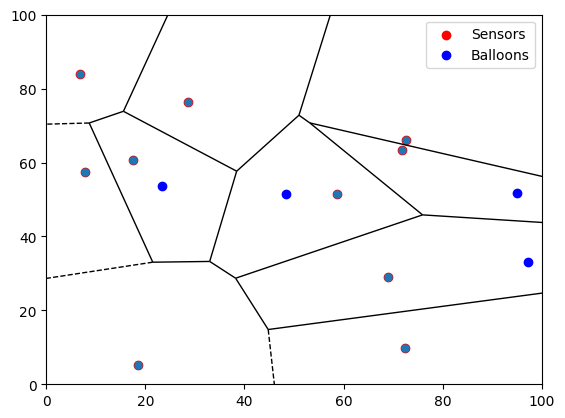

In [3]:
deployment = DeploymentVoronoi((100, 100), 10)
deployment.deploy()
deployment.plot_deployment()

<Figure size 1000x1000 with 0 Axes>

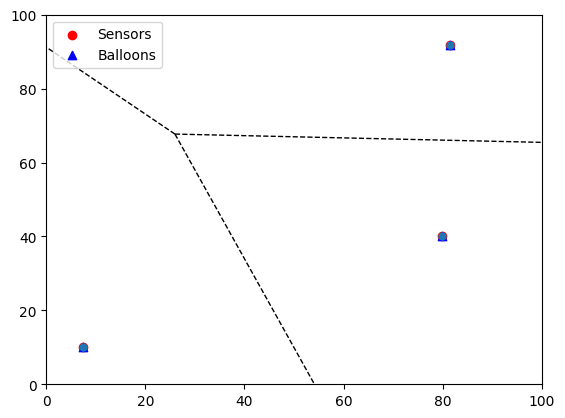

In [14]:
class DeploymentVoronoiFixedBalloons:
    def __init__(self, area_dimensions, num_sensors, num_balloons):
        self.area_dimensions = area_dimensions  # (width, height)
        self.num_sensors = num_sensors
        self.num_balloons = num_balloons
        self.sensors = []
        self.balloons = []

    def place_sensors(self):
        self.sensors = np.random.rand(self.num_sensors, 2)
        self.sensors[:, 0] *= self.area_dimensions[0]
        self.sensors[:, 1] *= self.area_dimensions[1]

    def generate_voronoi(self):
        self.voronoi = Voronoi(self.sensors)

    def place_balloons(self):

        points = self.voronoi.points
        for point in points:
            self.balloons.append(point)  # Directly using sensor positions for simplicity

    def deploy(self):
        self.place_sensors()
        self.generate_voronoi()
        self.place_balloons()

    def plot_deployment(self):
        plt.figure(figsize=(10, 10))
        voronoi_plot_2d(self.voronoi, show_vertices=False, point_size=10)
        plt.scatter(*zip(*self.sensors), color='r', label='Sensors')
        plt.scatter(*zip(*self.balloons), color='b', label='Balloons', marker='^')
        plt.xlim(0, self.area_dimensions[0])
        plt.ylim(0, self.area_dimensions[1])
        plt.legend()
        plt.show()

deployment = DeploymentVoronoiFixedBalloons((100, 100), 3, 1)
deployment.deploy()
deployment.plot_deployment()

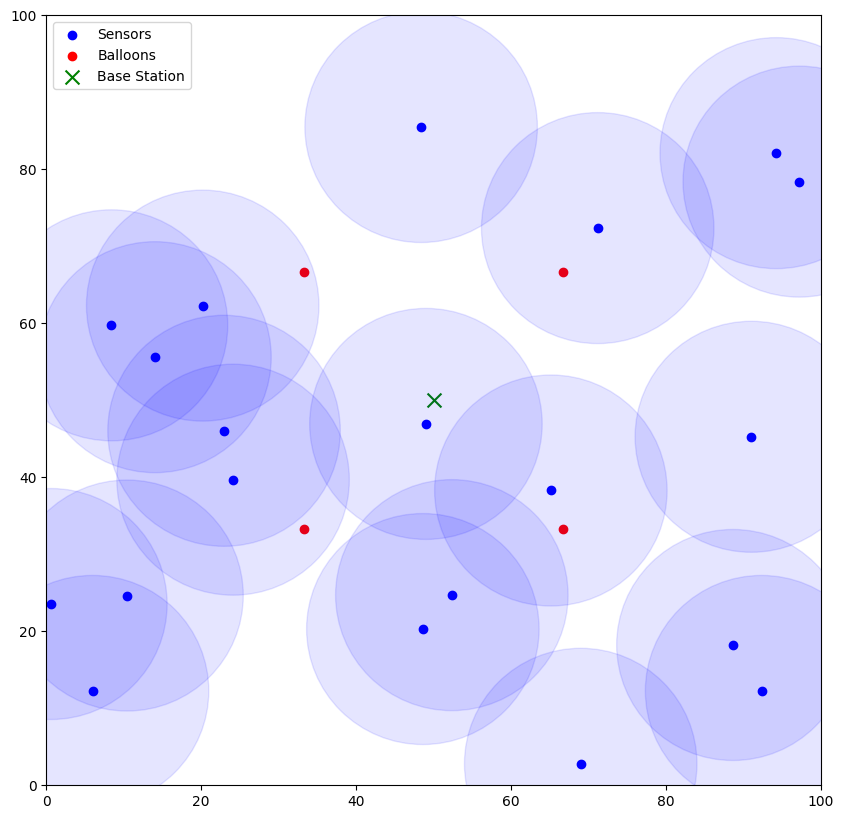

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class SensorDeployment:
    def __init__(self, num_sensors, num_balloons, base_station, sensor_range, area_width, area_height):
        self.num_sensors = num_sensors
        self.num_balloons = num_balloons
        self.base_station = base_station
        self.sensor_range = sensor_range
        self.area_width = area_width
        self.area_height = area_height
        self.sensors = []
        self.balloons = []

    def generate_positions(self):
        self.sensors = np.random.rand(self.num_sensors, 2) * [self.area_width, self.area_height]
        self.balloons = self.grid_balloons()

    def grid_balloons(self):
        grid_size = int(np.sqrt(self.num_balloons))
        x = np.linspace(0, self.area_width, grid_size + 2)[1:-1]
        y = np.linspace(0, self.area_height, grid_size + 2)[1:-1]
        xv, yv = np.meshgrid(x, y)
        balloons = np.vstack((xv.flatten(), yv.flatten())).T
        return balloons[:self.num_balloons]

    def check_coverage(self):
        for sensor in self.sensors:
            distances = np.linalg.norm(self.balloons - sensor, axis=1)
            if np.min(distances) > self.sensor_range:
                return False
        return True

    def deploy(self):
        self.generate_positions()
        if not self.check_coverage():
            print("Warning: Not all sensors are covered by balloons.")
        self.plot_deployment()

    def plot_deployment(self):
        plt.figure(figsize=(10, 10))
        plt.xlim(0, self.area_width)
        plt.ylim(0, self.area_height)

        sensors_x, sensors_y = self.sensors.T
        plt.scatter(sensors_x, sensors_y, c='blue', label='Sensors')

        balloons_x, balloons_y = self.balloons.T
        plt.scatter(balloons_x, balloons_y, c='red', label='Balloons')

        plt.scatter(*self.base_station, c='green', marker='x', s=100, label='Base Station')

        for sensor in self.sensors:
            circle = plt.Circle(sensor, self.sensor_range, color='blue', alpha=0.1)
            plt.gca().add_patch(circle)

        plt.legend()
        plt.show()

num_sensors = 20
num_balloons = 5
base_station = (50, 50)
sensor_range = 15
area_width = 100
area_height = 100

deployment = SensorDeployment(num_sensors, num_balloons, base_station, sensor_range, area_width, area_height)
deployment.deploy()
